# Import necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
        

# Extract and read the data

In [2]:
zip_path="credit_fraud.zip"
extract_path="credit_fraud"
os.makedirs(extract_path,exist_ok=True)

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
print("extraction completed")

# read the data

df=pd.read_csv("credit_fraud/creditcard.csv")

extraction completed


# Basic data info 

In [3]:
# print(f"data peak:\n {df.head(2)}\n")
print(f"data shape:\n\nrows = {df.shape[0]} and columns = {df.shape[1]}\n")
print(f"column names: {df.columns}")


data shape:

rows = 284807 and columns = 31

column names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

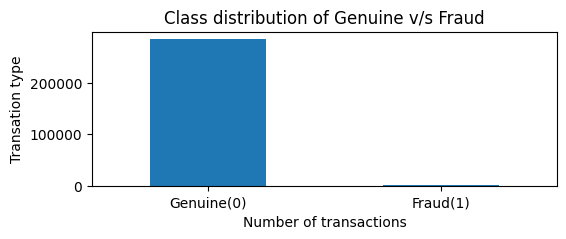

In [5]:
#visualization of the imbalance intensity
class_counts=df['Class'].value_counts()

# plots

plt.figure(figsize=(6,2))
class_counts.plot(kind='bar')
# (class_counts / len(df) * 100).plot(kind="bar", figsize=(6,4)) #---> for viewing as percentage data plot
plt.xticks([0,1],["Genuine(0)","Fraud(1)"],rotation=0)
plt.title("Class distribution of Genuine v/s Fraud")
plt.xlabel("Number of transactions")
plt.ylabel("Transation type")
plt.show()


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


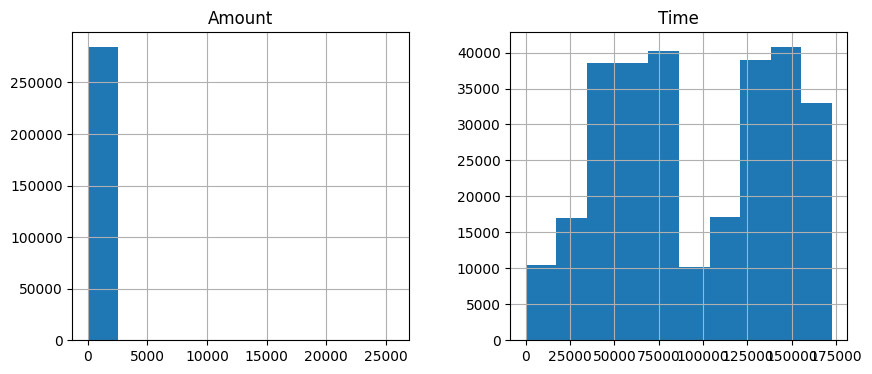

In [7]:


df[["Amount", "Time"]].hist(figsize=(10,4))
plt.show()


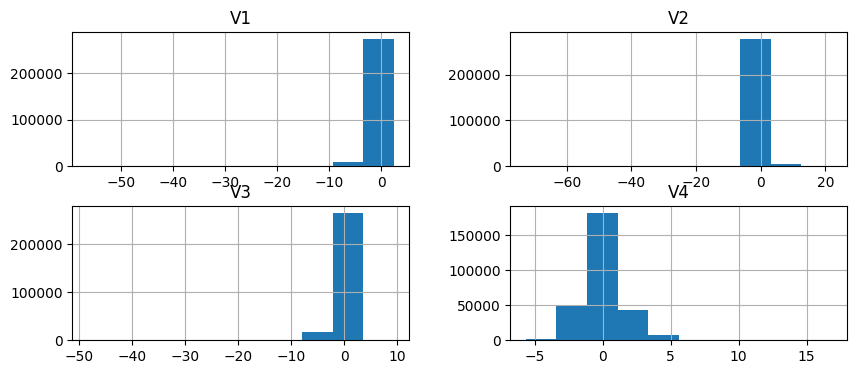

In [8]:
df[[f"V{i}" for i in range(1, 5)]].hist(figsize=(10,4))
plt.show()


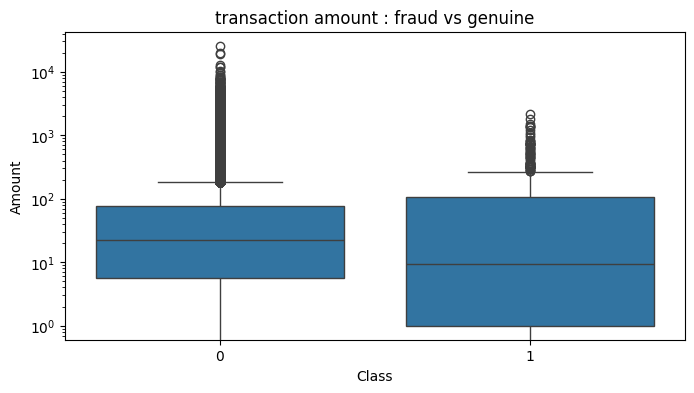

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Class",y="Amount",data=df)
plt.yscale("log")
plt.title("transaction amount : fraud vs genuine")
plt.show()

# Preprocessing

### Feature and target separation

In [10]:
X=df.drop(["Class"],axis=1)
y = df["Class"]

### Creating train and test set

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)
train_df.to_csv("train_csv",index=False)
test_df.to_csv("test_csv",index=False)

### Feature scaling 

In [12]:
scale_cols= ["Amount","Time"]
scaler=StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

## Class imbalance handling
#### To address the severe class imbalance, class weights inversely proportional to class frequencies were applied during training. This approach penalizes misclassification of the minority fraud class more heavily, encouraging the model to detect rare fraudulent patterns while preserving the original data distribution and realistic generalization. 

In [13]:
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict


{np.int64(0): np.float64(0.5008661206149896),
 np.int64(1): np.float64(289.14340101522845)}

## Model Training

In [14]:
lr= LogisticRegression(
    class_weight=class_weight_dict,
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1
)

lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{np.int64(0): np.float64(0.5008661206149896), np.int64(1): np.float64(289.14340101522845)}"
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Baseline model Prediction

In [15]:
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### Model Improvement 
#### For improving model performance here we will tune the default threshold of 0.5 to some better value so as to generalize the model for better classification and improving the recall score.

In [16]:
# threshold tuning
y_proba = lr.predict_proba(X_test)[:,1]

In [17]:
threshold = np.arange(0.1,0.9,0.01)
for t in threshold:
    y_pred_t = (y_proba>=t).astype(int)
    precision = precision_score(y_test,y_pred_t)
    recall = recall_score(y_test,y_pred_t)
    f1=f1_score(y_test,y_pred_t)
print(f"Threshold: {t:2f}\nPrecision: {precision:3f}\nRecall: {t:3f}\nF1-score:{t:3f}")

Threshold: 0.890000
Precision: 0.226562
Recall: 0.890000
F1-score:0.890000
